# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

# Load Data

In [2]:
df = pd.read_csv('AirQualityUCI.csv', sep=';')
df

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0     10/03/2004  18.00.00    2,6         1360       150     11,9   
1     10/03/2004  19.00.00      2         1292       112      9,4   
2     10/03/2004  20.00.00    2,2         1402        88      9,0   
3     10/03/2004  21.00.00    2,2         1376        80      9,2   
4     10/03/2004  22.00.00    1,6         1272        51      6,5   
...          ...       ...    ...          ...       ...      ...   
9352  04/04/2005  10.00.00    3,1         1314      -200     13,5   
9353  04/04/2005  11.00.00    2,4         1163      -200     11,4   
9354  04/04/2005  12.00.00    2,4         1142      -200     12,4   
9355  04/04/2005  13.00.00    2,1         1003      -200      9,5   
9356  04/04/2005  14.00.00    2,2         1071      -200     11,9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0              1046      166          1056      113          1692   
1               955      103          1174       92          1559   
2               939      131          1140      114          1555   
3               948      172          1092      122          1584   
4               836      131          1205      116          1490   
...             ...      ...           ...      ...           ...   
9352           1101      472           539      190          1374   
9353           1027      353           604      179          1264   
9354           1063      293           603      175          1241   
9355            961      235           702      156          1041   
9356           1047      265           654      168          1129   

      PT08.S5(O3)     T    RH      AH  Unnamed: 15  Unnamed: 16  
0            1268  13,6  48,9  0,7578          NaN          NaN  
1             972  13,3  47,7  0,7255          NaN          NaN  
2            1074  11,9  54,0  0,7502          NaN          NaN  
3            1203  11,0  60,0  0,7867          NaN          NaN  
4            1110  11,2  59,6  0,7888          NaN          NaN  
...           ...   ...   ...     ...          ...          ...  
9352         1729  21,9  29,3  0,7568          NaN          NaN  
9353         1269  24,3  23,7  0,7119          NaN          NaN  
9354         1092  26,9  18,3  0,6406          NaN          NaN  
9355          770  28,3  13,5  0,5139          NaN          NaN  
9356          816  28,5  13,1  0,5028          NaN          NaN  

[9357 rows x 17 columns]

In [3]:
df = df.drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)' ,'Unnamed: 15', 'Unnamed: 16'])

# Dataset Variable Descriptions

## **1. Air Quality Variables**
- **`CO(GT)`**  
  - **Description**: Concentration of Carbon Monoxide (CO) in the air, measured in mg/m³.  
  - **Relevance**: Indicates air pollution caused by combustion processes, such as vehicles and industrial emissions.

- **`NMHC(GT)`**  
  - **Description**: Non-Methane Hydrocarbons concentration in micrograms per cubic meter.  
  - **Relevance**: Associated with industrial emissions and photochemical reactions in the atmosphere.

- **`C6H6(GT)`**  
  - **Description**: Benzene concentration in µg/m³.  
  - **Relevance**: Benzene is a toxic pollutant mainly emitted by vehicle exhaust and industrial processes.

- **`NOx(GT)`**  
  - **Description**: Concentration of Nitrogen Oxides (NOx) in µg/m³.  
  - **Relevance**: NOx is a precursor to smog and acid rain, primarily originating from vehicle and industrial emissions.

- **`NO2(GT)`**  
  - **Description**: Nitrogen Dioxide (NO2) concentration in µg/m³.  
  - **Relevance**: A harmful pollutant linked to respiratory problems, originating from fuel combustion.

---

## **2. Environmental Variables**
- **`T`**  
  - **Description**: Ambient temperature measured in degrees Celsius (°C).  
  - **Relevance**: Affects pollutant dispersion and chemical reactions in the atmosphere.

- **`RH`**  
  - **Description**: Relative Humidity as a percentage (%).  
  - **Relevance**: Indicates moisture in the air, influencing pollutant behavior and perception of air quality.

- **`AH`**  
  - **Description**: Absolute Humidity in g/m³.  
  - **Relevance**: Provides a measure of water vapor content in the air, which can affect sensor performance.

---

## **3. Time Variable**
- **`DateTime`**  
  - **Description**: Combined date and time of the observation (YYYY-MM-DD HH:MM:SS).  
  - **Relevance**: Used to track temporal patterns in air quality and environmental conditions.

---

# Data Processing

In [4]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')

In [5]:
df = df.drop(columns=['Date', 'Time'])

In [6]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.').astype('float')

## Variable Ranges for Air Quality Dataset

| **Variable**       | **Expected Range**      |
|---------------------|-------------------------|
| `CO(GT)`            | 0.1 - 30 ppm           |
| `NMHC(GT)`          | >= 0 mg/m³             |
| `C6H6(GT)`          | 0 - 50 µg/m³           |
| `NOx(GT)`           | 0 - 500 µg/m³          |
| `NO2(GT)`           | 0 - 400 µg/m³          |
| `T` (Temperature)   | -20°C to 50°C          |
| `RH` (Humidity)     | 0% - 100%              |
| `AH` (Absolute Humidity) | 0 - 1 kg/m³      |

In [7]:
# Replace invalid values for each variable
df['NMHC(GT)'] = df['NMHC(GT)'].replace(-200, np.nan)
df['NOx(GT)'] = df['NOx(GT)'].replace(-200, np.nan)
df['NO2(GT)'] = df['NO2(GT)'].replace(-200, np.nan)

# Cap values or set to NaN for invalid ranges
df['CO(GT)'] = df['CO(GT)'].mask((df['CO(GT)'] < 0.1) | (df['CO(GT)'] > 30), np.nan)
df['C6H6(GT)'] = df['C6H6(GT)'].mask((df['C6H6(GT)'] < 0) | (df['C6H6(GT)'] > 50), np.nan)
df['T'] = df['T'].mask((df['T'] < -20) | (df['T'] > 50), np.nan)
df['RH'] = df['RH'].mask((df['RH'] < 0) | (df['RH'] > 100), np.nan)
df['AH'] = df['AH'].mask((df['AH'] < 0) | (df['AH'] > 1), np.nan)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   CO(GT)    7674 non-null   float64       
 1   NMHC(GT)  914 non-null    float64       
 2   C6H6(GT)  8986 non-null   float64       
 3   NOx(GT)   7718 non-null   float64       
 4   NO2(GT)   7715 non-null   float64       
 5   T         8991 non-null   float64       
 6   RH        8991 non-null   float64       
 7   AH        4544 non-null   float64       
 8   DateTime  9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(8)
memory usage: 658.0 KB


In [9]:
df.isna().sum()

CO(GT)      1683
NMHC(GT)    8443
C6H6(GT)     371
NOx(GT)     1639
NO2(GT)     1642
T            366
RH           366
AH          4813
DateTime       0
dtype: int64

In [10]:
imputer = KNNImputer(n_neighbors=5)
df[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']] = imputer.fit_transform(df[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']])

In [11]:
df.isna().sum()

CO(GT)      0
NMHC(GT)    0
C6H6(GT)    0
NOx(GT)     0
NO2(GT)     0
T           0
RH          0
AH          0
DateTime    0
dtype: int64

In [12]:
df.describe()

CO(GT)     NMHC(GT)     C6H6(GT)      NOx(GT)      NO2(GT)  \
count  9357.000000  9357.000000  9357.000000  9357.000000  9357.000000   
mean      2.099732   138.324502    10.116369   236.274896   109.681333   
min       0.100000     7.000000     0.100000     2.000000     2.000000   
25%       1.000000    60.000000     4.500000    93.000000    74.000000   
50%       1.760000    88.400000     8.300000   171.000000   105.000000   
75%       2.800000   167.600000    14.000000   310.000000   137.000000   
max      11.900000  1189.000000    49.500000  1479.000000   340.000000   
std       1.428189   134.221757     7.356470   205.709100    47.006753   

                 T           RH           AH             DateTime  
count  9357.000000  9357.000000  9357.000000                 9357  
mean     18.378304    49.173769     0.821048  2004-09-21 16:00:00  
min      -1.900000     9.200000     0.184700  2004-03-10 18:00:00  
25%      12.000000    36.200000     0.723800  2004-06-16 05:00:00  
50%      17.900000    49.400000     0.917340  2004-09-21 16:00:00  
75%      24.300000    62.100000     0.961600  2004-12-28 03:00:00  
max      44.600000    88.700000     0.999800  2005-04-04 14:00:00  
std       8.716008    17.089990     0.192274                  NaN

In [13]:
df

CO(GT)  NMHC(GT)  C6H6(GT)  NOx(GT)  NO2(GT)     T    RH      AH  \
0        2.6     150.0      11.9    166.0    113.0  13.6  48.9  0.7578   
1        2.0     112.0       9.4    103.0     92.0  13.3  47.7  0.7255   
2        2.2      88.0       9.0    131.0    114.0  11.9  54.0  0.7502   
3        2.2      80.0       9.2    172.0    122.0  11.0  60.0  0.7867   
4        1.6      51.0       6.5    131.0    116.0  11.2  59.6  0.7888   
...      ...       ...       ...      ...      ...   ...   ...     ...   
9352     3.1      35.4      13.5    472.0    190.0  21.9  29.3  0.7568   
9353     2.4      35.4      11.4    353.0    179.0  24.3  23.7  0.7119   
9354     2.4     403.2      12.4    293.0    175.0  26.9  18.3  0.6406   
9355     2.1     401.2       9.5    235.0    156.0  28.3  13.5  0.5139   
9356     2.2     492.4      11.9    265.0    168.0  28.5  13.1  0.5028   

                DateTime  
0    2004-03-10 18:00:00  
1    2004-03-10 19:00:00  
2    2004-03-10 20:00:00  
3    2004-03-10 21:00:00  
4    2004-03-10 22:00:00  
...                  ...  
9352 2005-04-04 10:00:00  
9353 2005-04-04 11:00:00  
9354 2005-04-04 12:00:00  
9355 2005-04-04 13:00:00  
9356 2005-04-04 14:00:00  

[9357 rows x 9 columns]

# Exploratory Data Analysis

In [14]:
df_copy = df.copy()

## Feature Data Distribution

### Air Quality

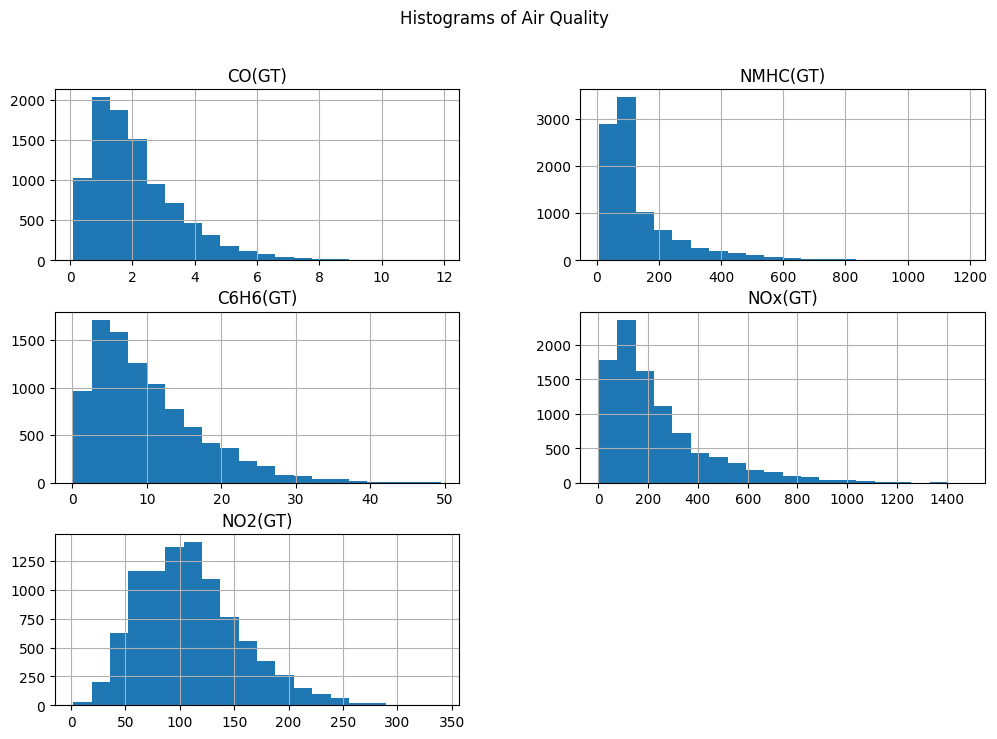

In [15]:
airquality_col = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
df_copy[airquality_col].hist(bins=20, figsize=(12, 8), grid=True)
plt.suptitle("Histograms of Air Quality")
plt.show()

### Pairwise Relation

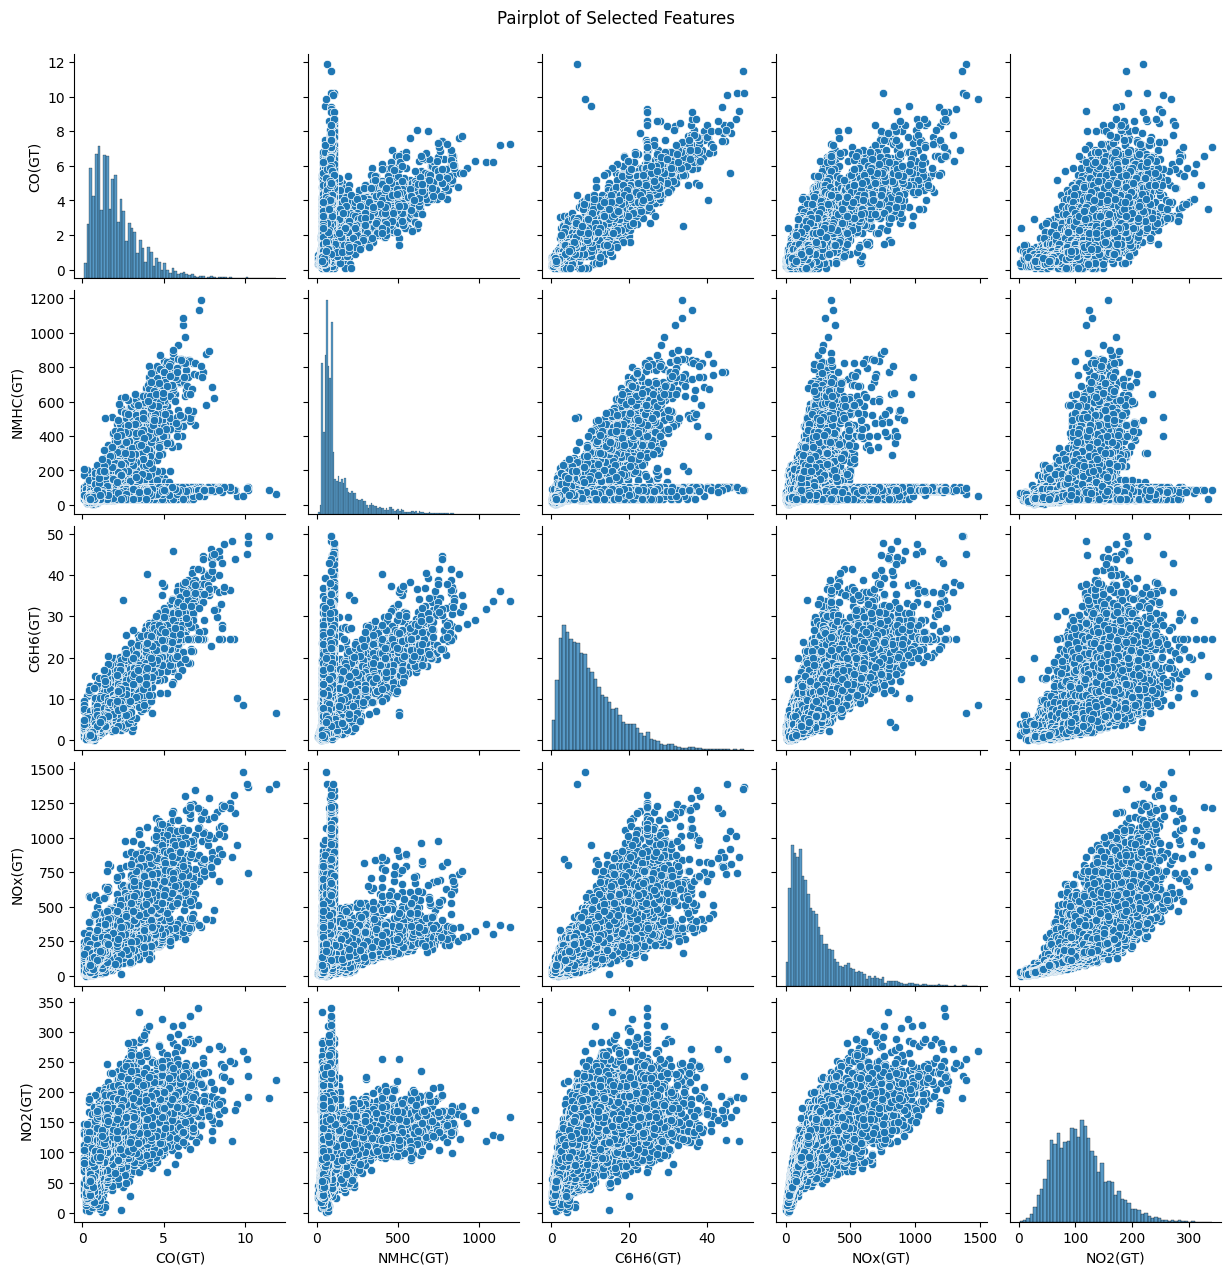

In [16]:
sns.pairplot(df_copy, vars=airquality_col)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

### Detect Outliers

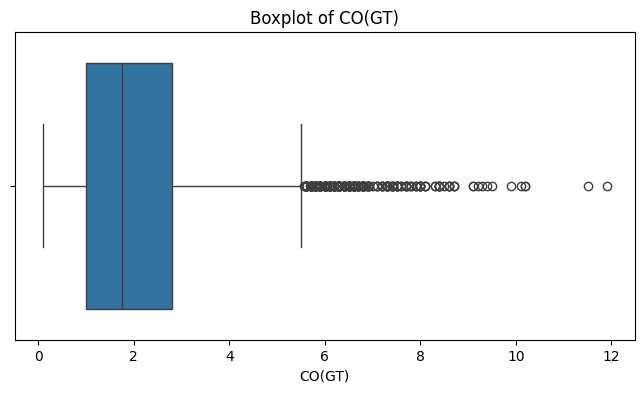

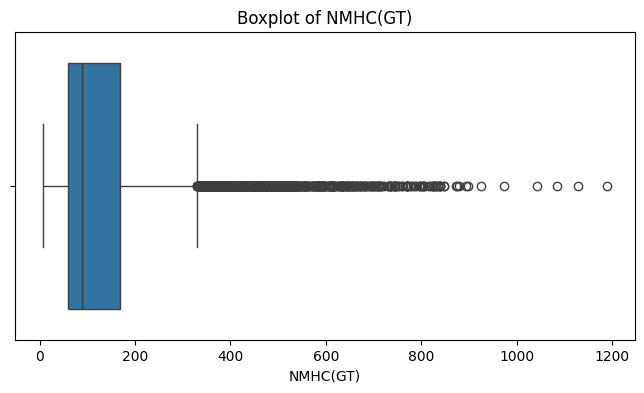

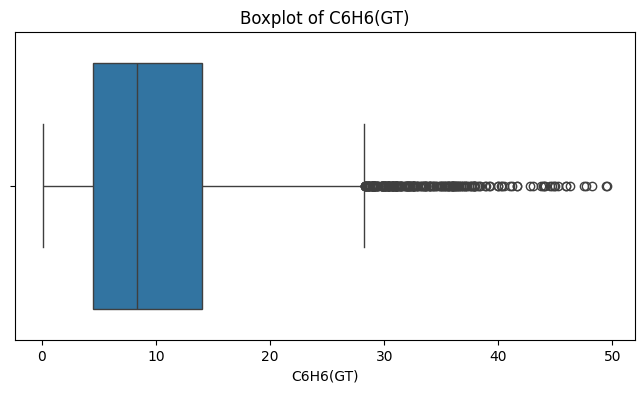

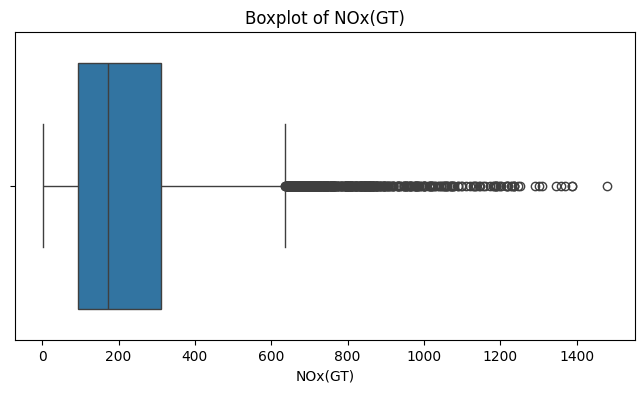

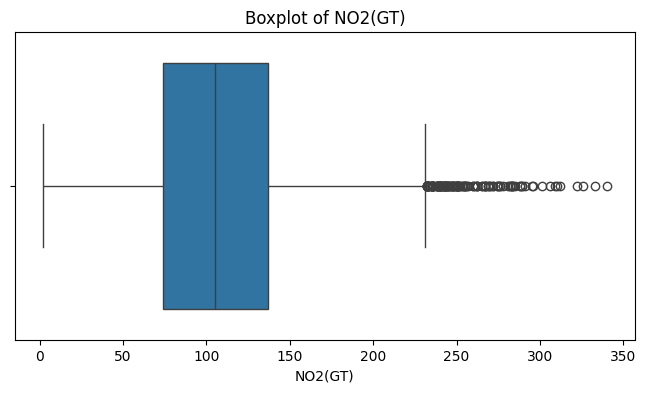

In [17]:
for col in airquality_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_copy, x = col)
    plt.title(f"Boxplot of {col}")
    plt.show()

### Enviroment Variable

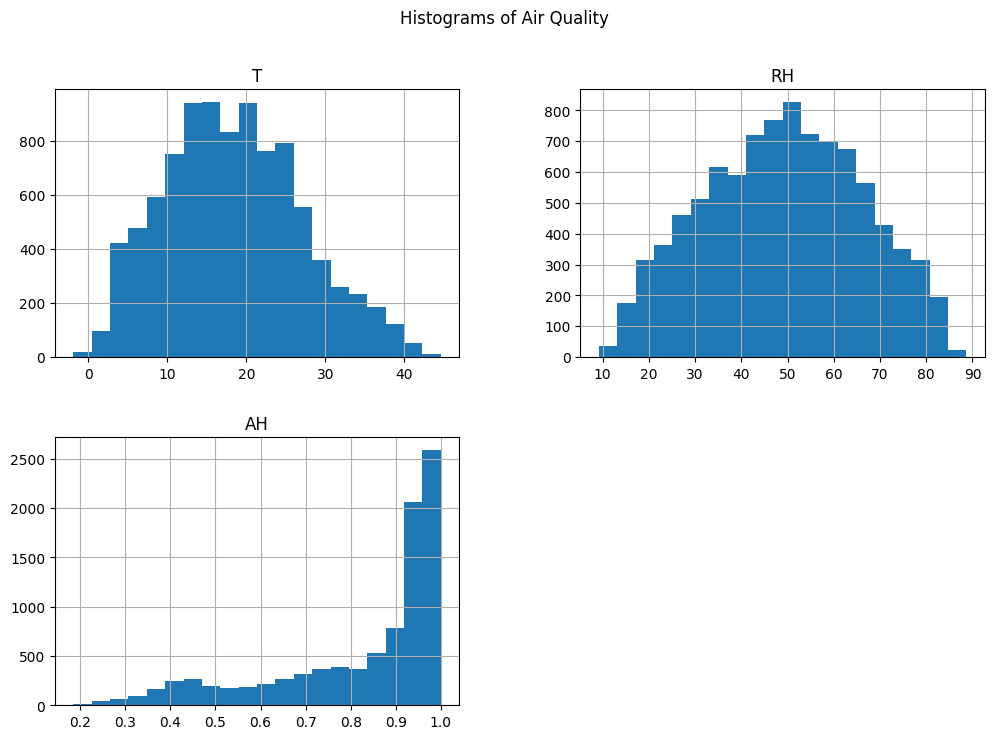

In [18]:
enviromentvariable_col = ['T', 'RH', 'AH']
df_copy[enviromentvariable_col].hist(bins=20, figsize=(12, 8), grid=True)
plt.suptitle("Histograms of Air Quality")
plt.show()

### Pairwise Relation

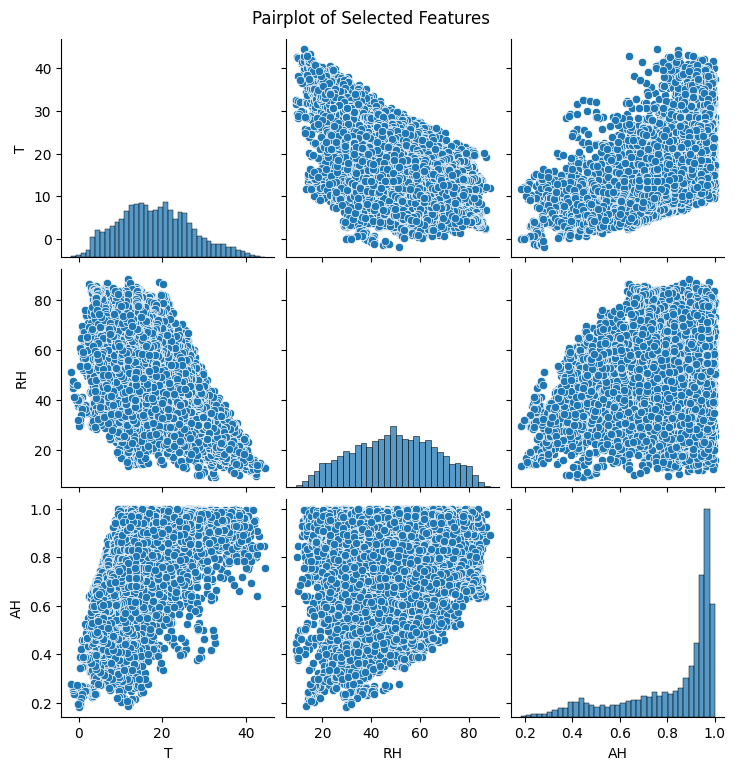

In [19]:
sns.pairplot(df_copy, vars=enviromentvariable_col)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

### Detect Outliers

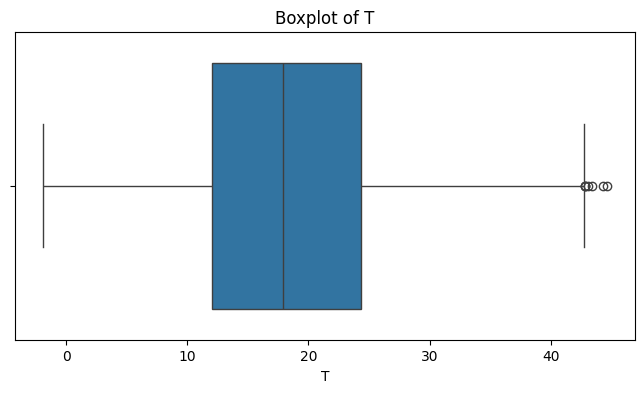

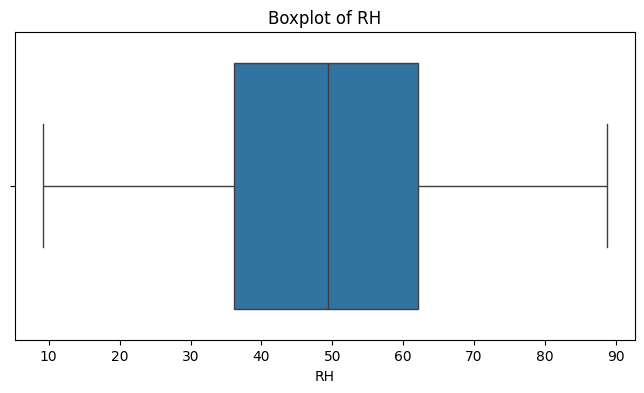

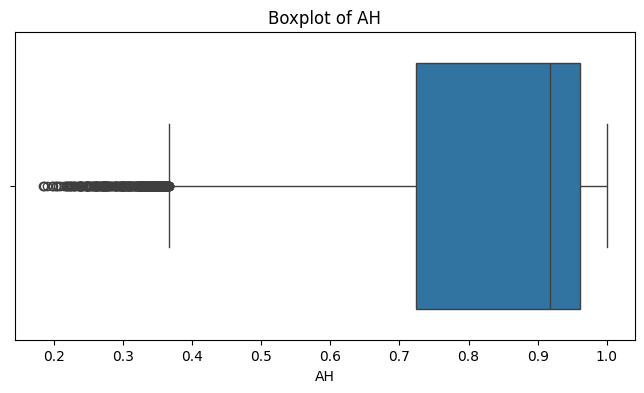

In [20]:
for col in enviromentvariable_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_copy, x = col)
    plt.title(f"Boxplot of {col}")
    plt.show()

## Bivariate Analysis

### Correlations Between Variables

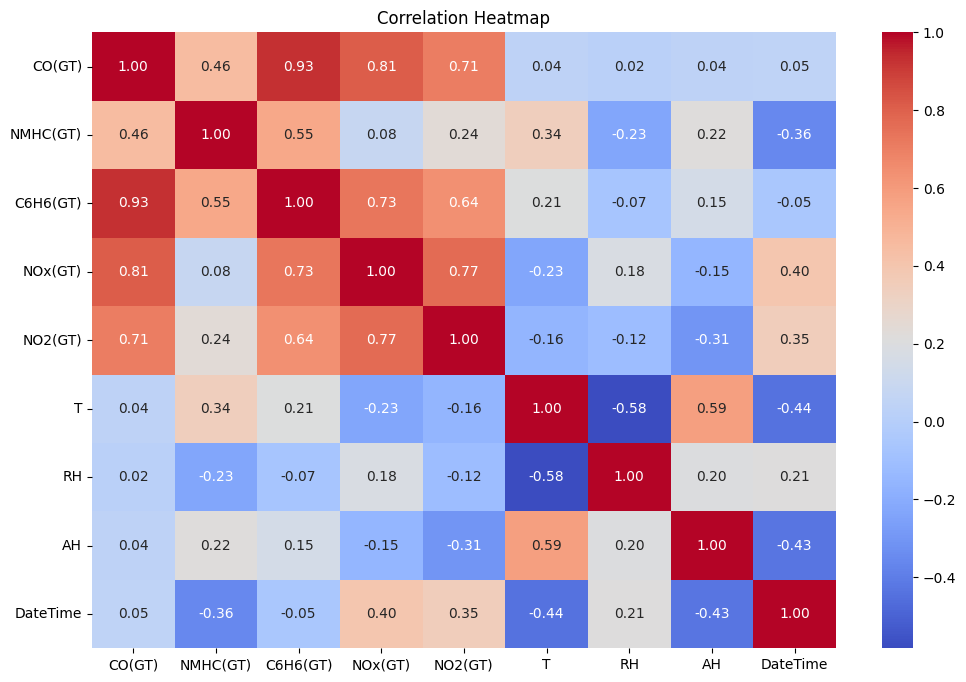

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

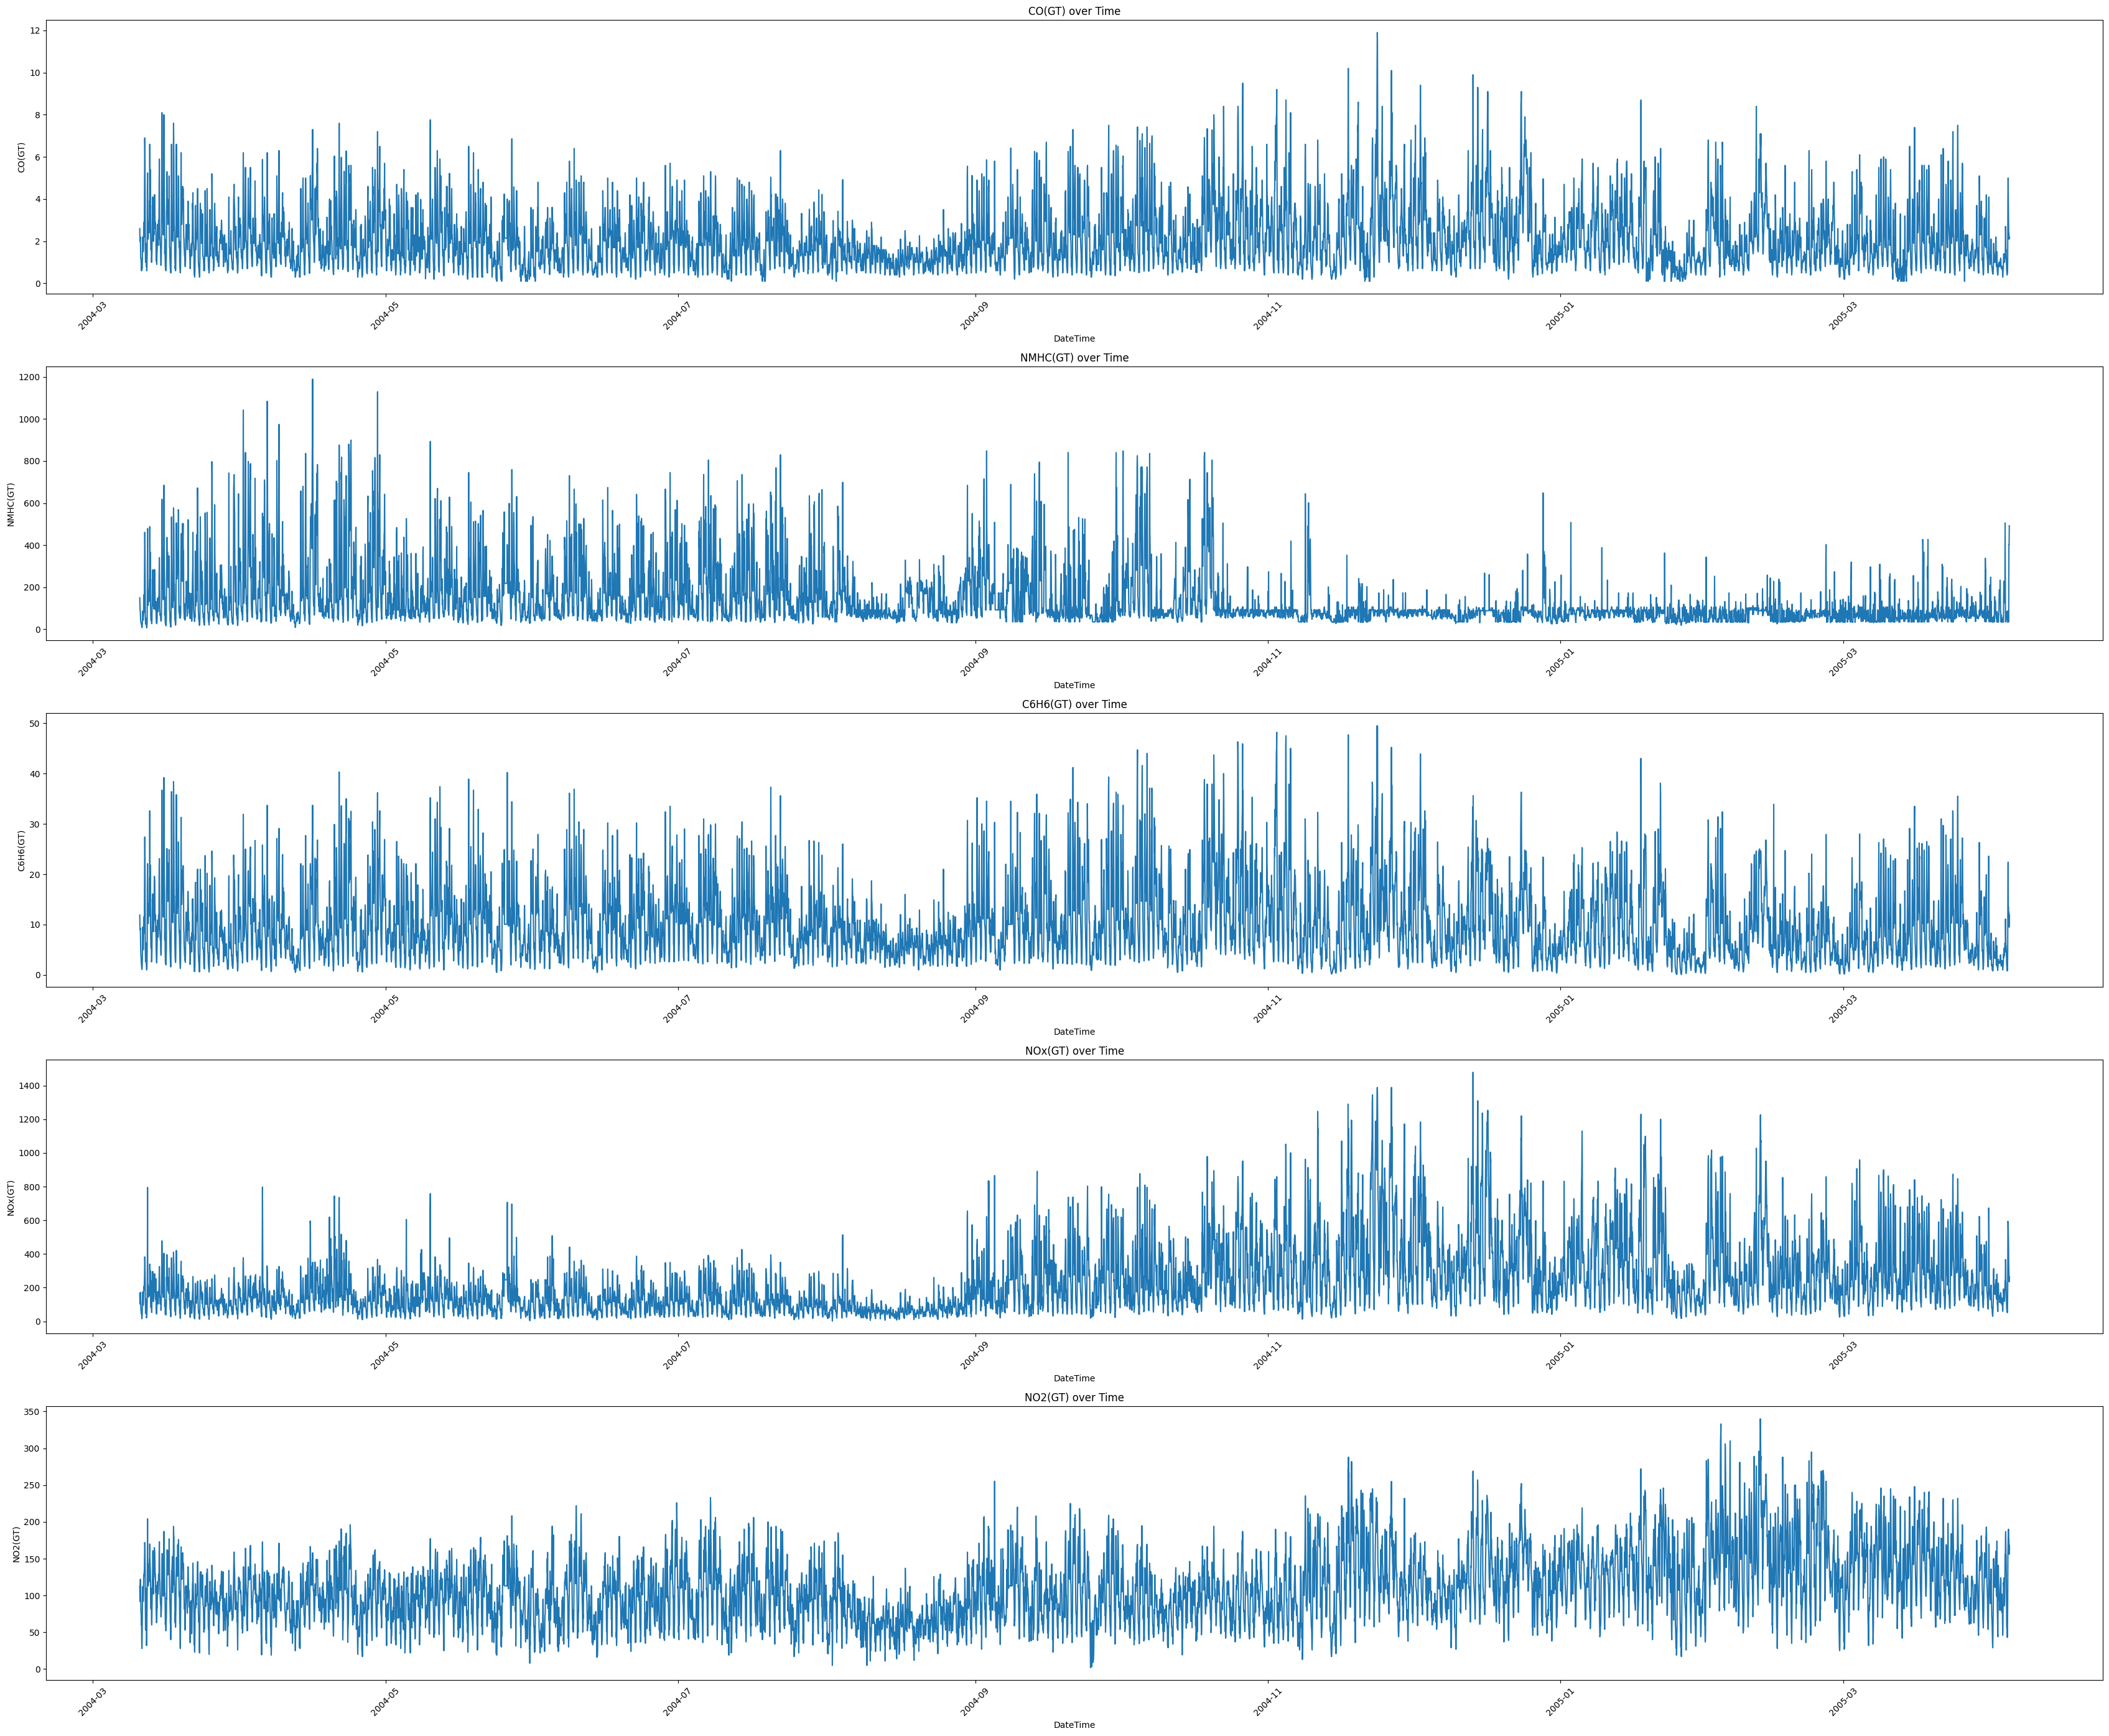

In [22]:
plt.figure(figsize=(34, 28))
for i, metric in enumerate(airquality_col):
    plt.subplot(len(airquality_col), 1, i + 1)
    sns.lineplot(x=df_copy['DateTime'], y=df_copy[metric])
    plt.title(f'{metric} over Time')
    plt.xlabel('DateTime')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

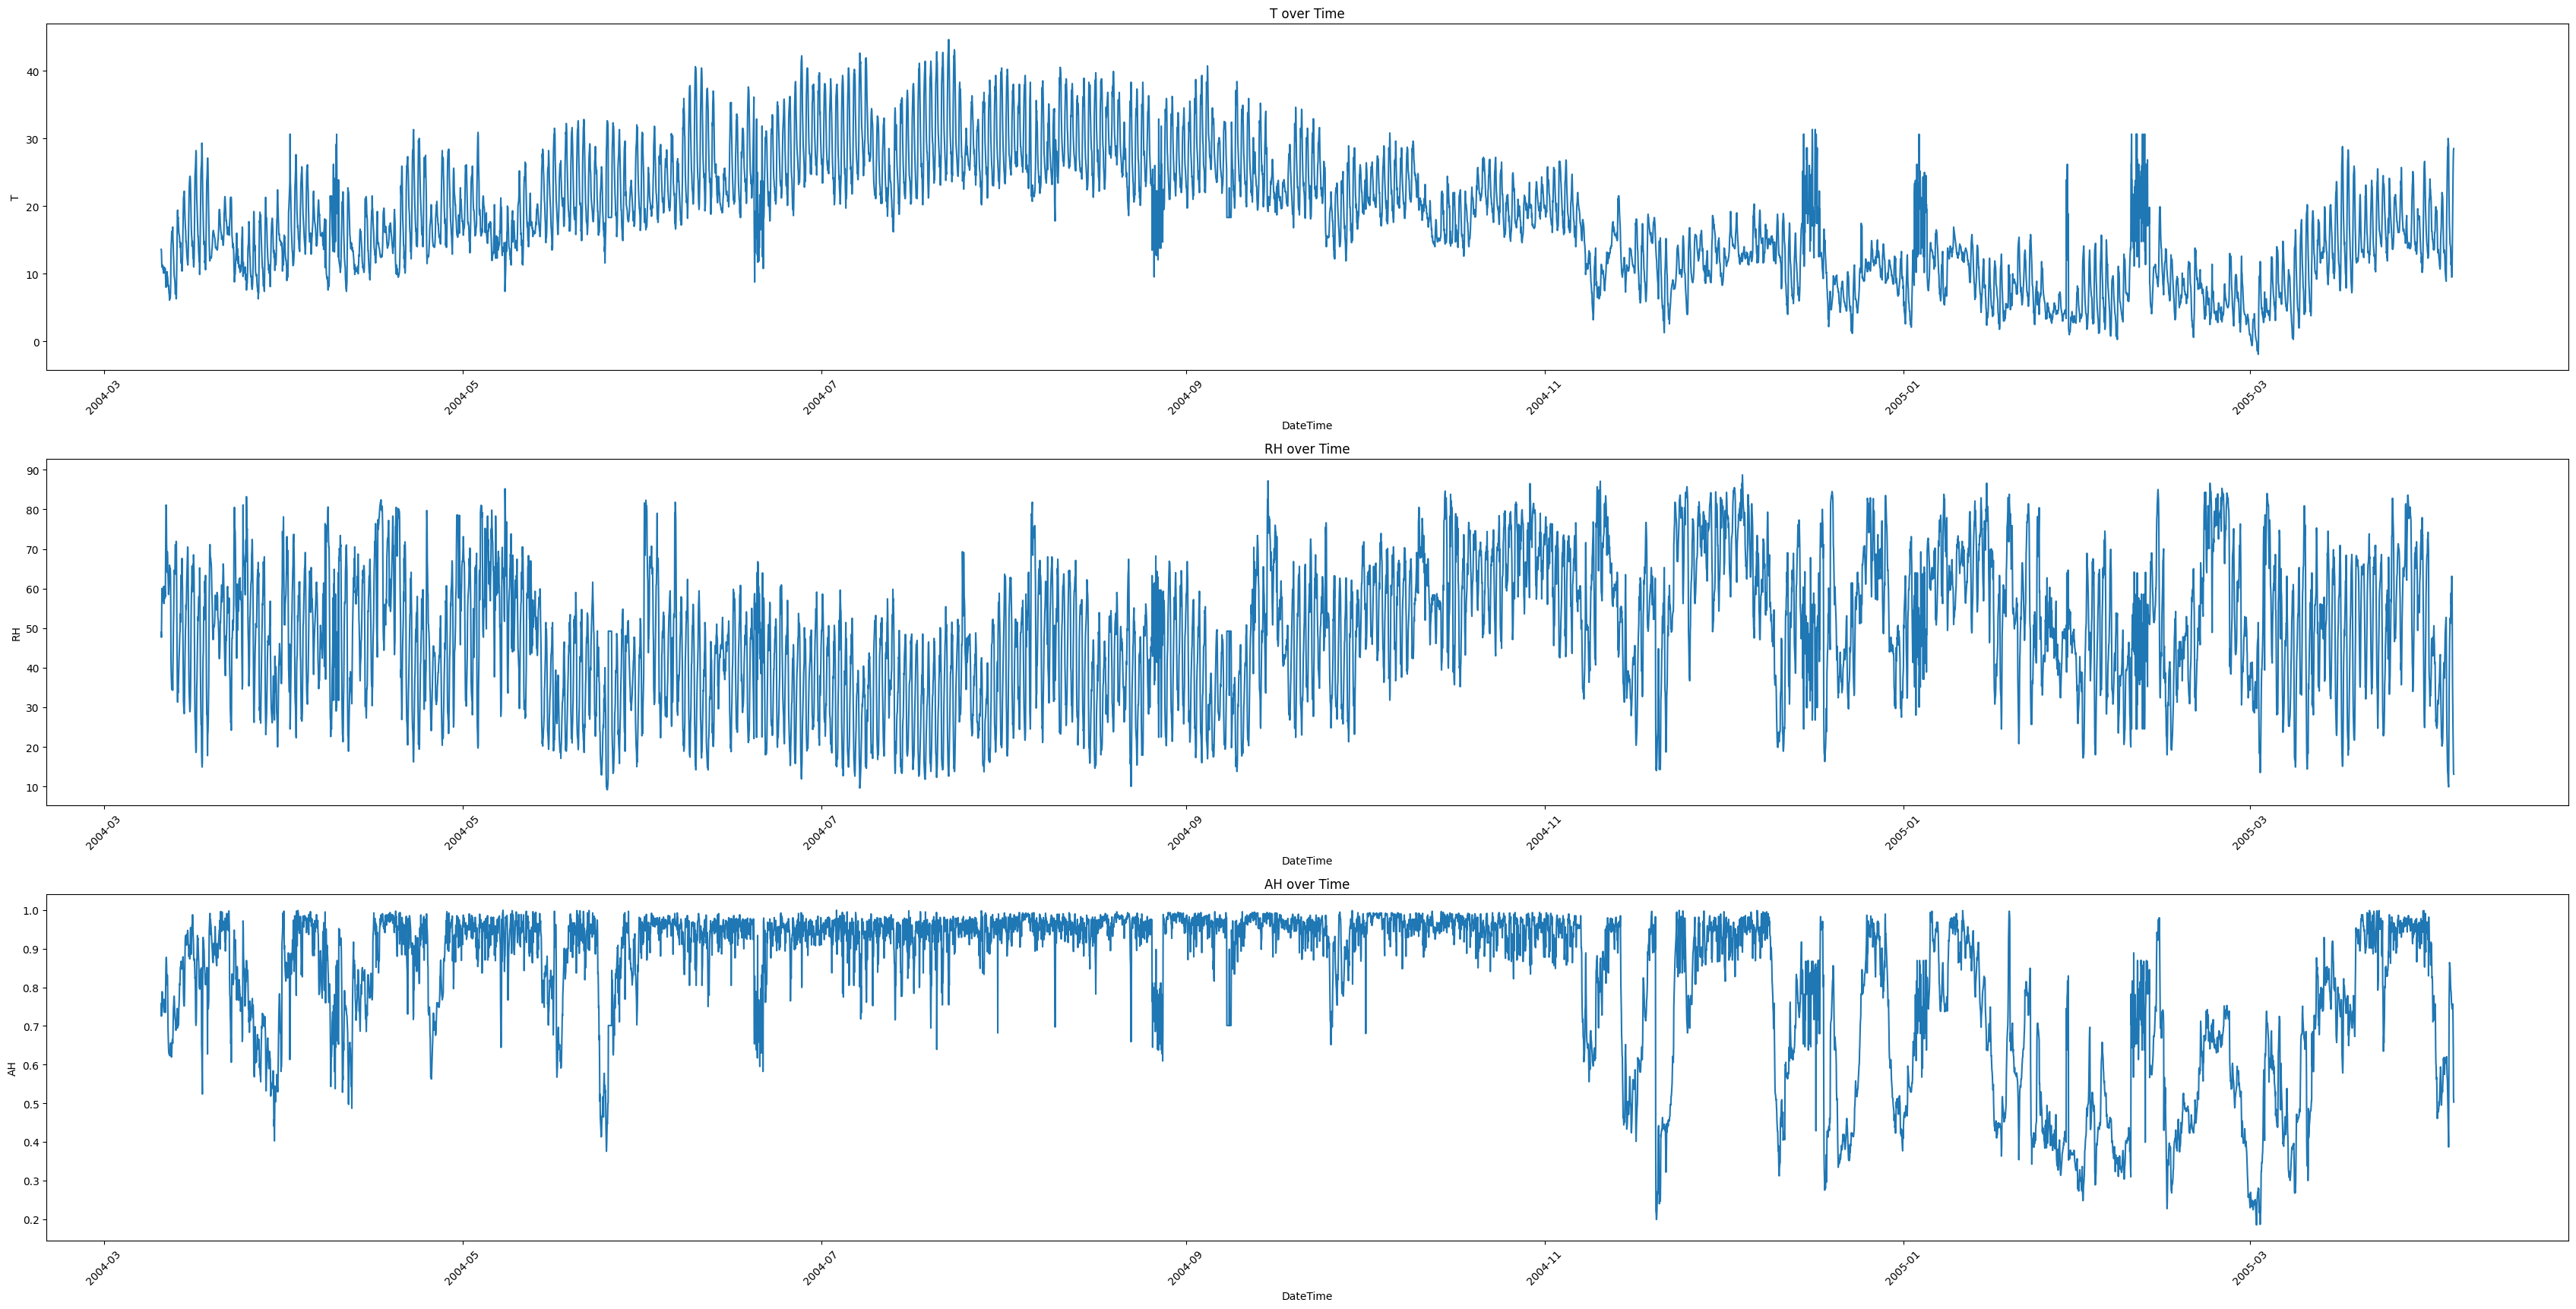

In [23]:
plt.figure(figsize=(34, 28))
for i, metric in enumerate(enviromentvariable_col):
    plt.subplot(len(airquality_col), 1, i + 1)
    sns.lineplot(x=df_copy['DateTime'], y=df_copy[metric])
    plt.title(f'{metric} over Time')
    plt.xlabel('DateTime')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Splitting Data

In [24]:
X = df.drop(columns='DateTime')
y = df['DateTime'].astype(np.int64)

In [25]:
scaler = MinMaxScaler()
y = scaler.fit_transform(np.array(y).reshape(-1, 1))

In [26]:
X

CO(GT)  NMHC(GT)  C6H6(GT)  NOx(GT)  NO2(GT)     T    RH      AH
0        2.6     150.0      11.9    166.0    113.0  13.6  48.9  0.7578
1        2.0     112.0       9.4    103.0     92.0  13.3  47.7  0.7255
2        2.2      88.0       9.0    131.0    114.0  11.9  54.0  0.7502
3        2.2      80.0       9.2    172.0    122.0  11.0  60.0  0.7867
4        1.6      51.0       6.5    131.0    116.0  11.2  59.6  0.7888
...      ...       ...       ...      ...      ...   ...   ...     ...
9352     3.1      35.4      13.5    472.0    190.0  21.9  29.3  0.7568
9353     2.4      35.4      11.4    353.0    179.0  24.3  23.7  0.7119
9354     2.4     403.2      12.4    293.0    175.0  26.9  18.3  0.6406
9355     2.1     401.2       9.5    235.0    156.0  28.3  13.5  0.5139
9356     2.2     492.4      11.9    265.0    168.0  28.5  13.1  0.5028

[9357 rows x 8 columns]

In [27]:
y

array([[0.00000000e+00],
       [1.06883283e-04],
       [2.13766567e-04],
       ...,
       [9.99786233e-01],
       [9.99893117e-01],
       [1.00000000e+00]])

# Data Engineering

In [28]:
features_to_standardize = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'RH', 'AH']

scaler = StandardScaler()
X[features_to_standardize] = scaler.fit_transform(X[features_to_standardize])

# Model Training

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

# Evaluation

In [32]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.04221524818113066


# Model's coefficients and intercept

In [33]:
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficients: [[-0.1018443  -0.02354821 -0.08583698  0.18598743  0.07493728  0.01026884
   0.10406108 -0.125272  ]]
Model Intercept: [0.31105889]


# Learning Curve

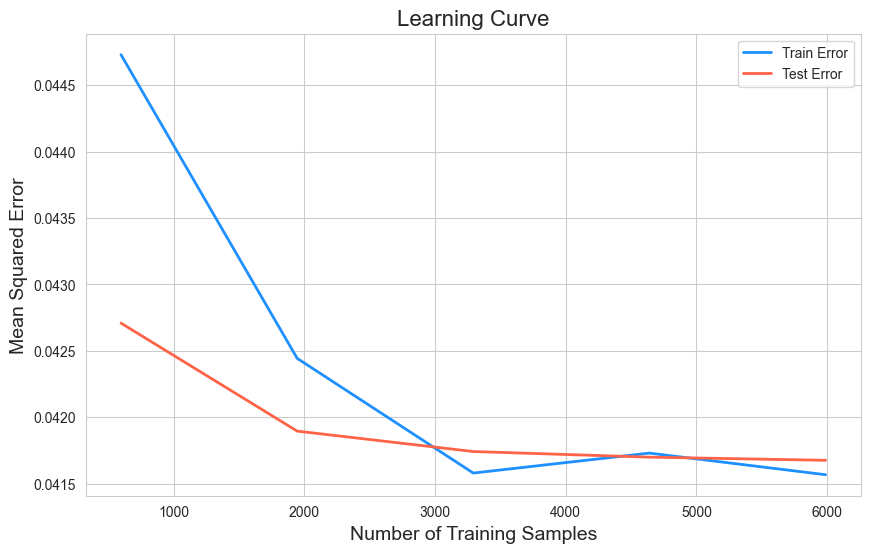

In [34]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# Plot train and test errors
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Train Error', color='dodgerblue', lw=2)
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Test Error', color='tomato', lw=2)

plt.title('Learning Curve', fontsize=16)
plt.xlabel('Number of Training Samples', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Prediction Error

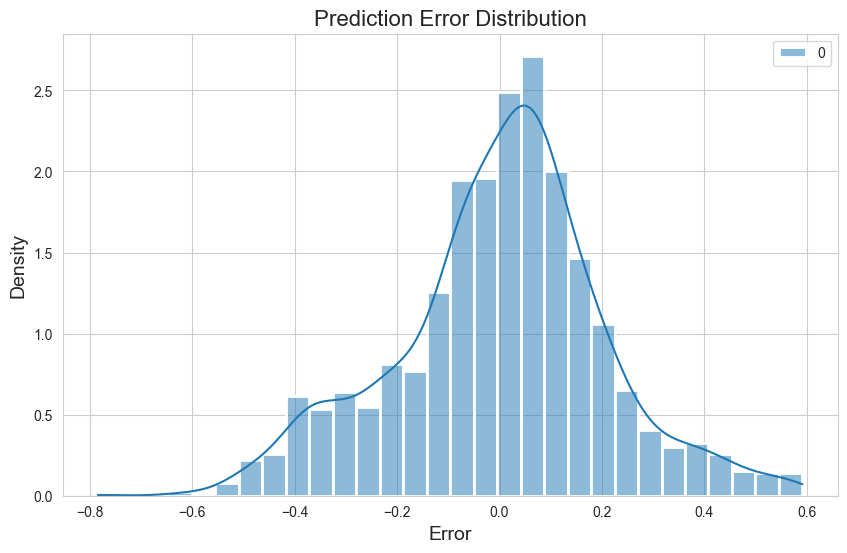

In [35]:
# Calculate prediction error
error = y_test - y_pred

# Plot prediction error distribution
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

sns.histplot(error, kde=True, color='mediumvioletred', bins=30, linewidth=2, stat='density')

plt.title('Prediction Error Distribution', fontsize=16)
plt.xlabel('Error', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()
